In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import time

In [2]:
# Load dataset
df_train= pd.read_csv('clean_df.csv')
df_test= pd.read_csv('clean_test_df.csv')

In [3]:
df_train.head()

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,Participant_ID,Depression,Gender
0,33.883310,0.188470,31.197649,31.198807,31.237043,0.039394,39.990345,28.040092,100.798780,0.000000,...,1.960784,2.061856,0.240000,0.010000,0.225,0.005000,-53.529380,448,1,1
1,23.442284,0.015231,23.083265,23.519197,23.799660,0.716394,0.000000,0.000000,-0.109734,0.000000,...,3.703704,2.040816,0.080000,0.000000,0.380,0.000000,-47.326970,448,1,1
2,26.658195,0.095594,24.275490,27.404346,29.017082,4.741592,61.829530,67.673560,20.461290,11.705440,...,3.131991,2.036199,0.344444,0.235472,0.115,0.087321,-41.121784,448,1,1
3,34.614662,0.005980,34.433628,34.559757,34.764160,0.330532,8.279264,5.828207,8.208370,6.596444,...,5.084746,1.886793,0.420000,0.000000,0.040,0.020000,-33.531155,448,1,1
4,43.782654,0.006530,43.540440,43.602890,44.168890,0.628452,7.757357,0.000000,3.900528,0.000000,...,2.531646,1.351351,0.110000,0.000000,0.300,0.010000,-39.635094,448,1,1


In [4]:
df_test.head()

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,Participant_ID,Depression,Gender
0,31.240383,0.007705,31.195211,31.197490,31.198797,0.003586,2.502873,2.195133,6.924655,0.000000,...,2.352941,2.531646,0.270000,0.010000,0.200000,0.000000,-43.037350,474,0,1
1,25.895664,0.022401,25.307716,26.016266,26.448654,1.140938,0.185591,0.000000,0.000000,0.000000,...,5.000000,1.818182,0.080000,0.000000,0.220000,0.130000,-40.589500,474,0,1
2,25.333618,0.093532,23.294510,24.970371,27.738895,4.444386,62.354210,62.804974,11.951715,16.090214,...,3.004292,2.631579,0.196667,0.169181,0.160000,0.110303,-36.454280,474,0,1
3,22.731540,0.048258,22.157387,22.643700,23.537909,1.380522,43.013565,45.249077,12.193955,4.822075,...,4.024768,2.656250,0.175882,0.155263,0.180588,0.118692,-39.491077,474,0,1
4,22.226995,0.036559,21.806602,22.638226,22.795425,0.988823,6.112480,2.537038,10.932255,0.000000,...,7.142857,3.174603,0.150000,0.100000,0.135000,0.015000,-40.291077,474,0,1


## Logistic Regression

In [5]:
target_col = ["Participant_ID", "Depression", "Gender"]
# target_col = "Depression"
feature_cols = list(set(df_train.columns) - set(target_col))

In [6]:
X = df_train[feature_cols]
y = df_train[target_col]

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=42)

In [8]:
X_test = df_test[feature_cols]
y_test = df_test[target_col]

In [9]:
y_test.head()

,Participant_ID,Depression,Gender
0,474,0,1
1,474,0,1
2,474,0,1
3,474,0,1
4,474,0,1


In [10]:
def calculate_class_weights(y, target_col):
    unique_classes, class_counts = np.unique(y[target_col], return_counts=True)
    total_samples = y.shape[0]
    class_weights = {}

    for class_label, class_count in zip(unique_classes, class_counts):
        class_weight = total_samples / (2.0 * class_count)
        class_weights[class_label] = class_weight

    return class_weights

Logistic Regression with L2 regularization(penalty: 10000) and class weights: {0: 0.7064553093964858, 1: 1.7109158186864015}
Accuracy: 0.3448275862068966
Balanced_accuracy: 0.5218253968253967
Precision: 0.2857142857142857
Recall: 0.9166666666666666
F1 Score: 0.4356435643564356


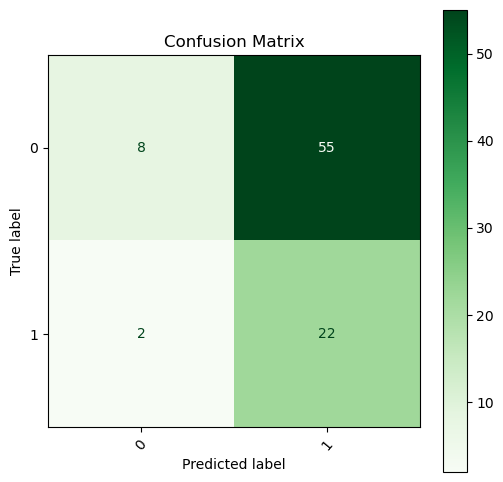

In [11]:
# Validation performance for hyp tuning
penalty = 10000
target = 'Depression'
cl_weights = calculate_class_weights(y_train, target)


# Scale
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_val_scaled = sc.transform(X_val)

# Logistic Regression
print(f"Logistic Regression with L2 regularization(penalty: {penalty}) and class weights: {cl_weights}")
lr = LogisticRegression(C=1/penalty, solver='liblinear', class_weight=cl_weights, max_iter=500)
lr.fit(X_train_scaled, y_train[target])
y_pred = lr.predict(X_val_scaled)

y_val['Predicted'] = y_pred
y_actual = y_val.groupby("Participant_ID").agg({"Depression":"max"})["Depression"]
y_pred = y_val.groupby("Participant_ID").agg({"Predicted":"max"})["Predicted"]

# Print Metrics
print(f"Accuracy: {metrics.accuracy_score(y_actual, y_pred)}")
print(f"Balanced_accuracy: {metrics.balanced_accuracy_score(y_actual, y_pred)}")
print(f"Precision: {metrics.precision_score(y_actual, y_pred)}")
print(f"Recall: {metrics.recall_score(y_actual, y_pred)}")
print(f"F1 Score: {metrics.f1_score(y_actual, y_pred)}")
conf_matrix = metrics.confusion_matrix(y_actual, y_pred)
#Visualizing the confusion matrix
plt.rcParams['figure.figsize'] = (6, 6)
display_c_m = metrics.ConfusionMatrixDisplay(conf_matrix)
display_c_m.plot(cmap='Greens', xticks_rotation=50)
plt.title('Confusion Matrix')
plt.show()

Logistic Regression with L2 regularization(penalty: 1000) and class weights: {0: 0.7064935064935065, 1: 1.7106918238993711}
Accuracy: 0.3
Balanced_accuracy: 0.5
Precision: 0.3
Recall: 1.0
F1 Score: 0.4615384615384615


/var/folders/6m/wg76ryq57fnb356nt5xwlbl80000gn/T/ipykernel_50906/1763318807.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['Predicted'] = y_pred


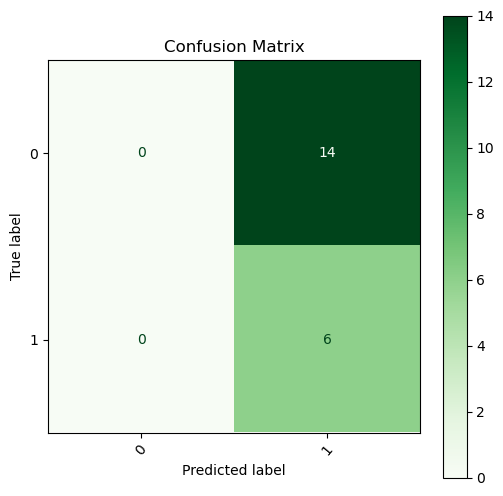

In [12]:
# Test performance
penalty = 1000
target = "Depression"
cl_weights = calculate_class_weights(y, target)

# Scale
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_test_scaled = sc.transform(X_test)

# Logistic Regression
print(f"Logistic Regression with L2 regularization(penalty: {penalty}) and class weights: {cl_weights}")
lr = LogisticRegression(C=1/penalty, solver='liblinear', class_weight=cl_weights, max_iter=500)
lr.fit(X_scaled, y[target])
y_pred = lr.predict(X_test_scaled)

y_test['Predicted'] = y_pred
y_actual = y_test.groupby("Participant_ID").agg({"Depression":"max"})["Depression"]
y_pred = y_test.groupby("Participant_ID").agg({"Predicted":"max"})["Predicted"]

# Print Metrics
print(f"Accuracy: {metrics.accuracy_score(y_actual, y_pred)}")
print(f"Balanced_accuracy: {metrics.balanced_accuracy_score(y_actual, y_pred)}")
print(f"Precision: {metrics.precision_score(y_actual, y_pred)}")
print(f"Recall: {metrics.recall_score(y_actual, y_pred)}")
print(f"F1 Score: {metrics.f1_score(y_actual, y_pred)}")
conf_matrix = metrics.confusion_matrix(y_actual, y_pred)
#Visualizing the confusion matrix
plt.rcParams['figure.figsize'] = (6, 6)
display_c_m = metrics.ConfusionMatrixDisplay(conf_matrix)
display_c_m.plot(cmap='Greens', xticks_rotation=50)
plt.title('Confusion Matrix')
plt.show()